In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, RandomOverSampler
from sklearn.metrics import f1_score


In [2]:
df_entrenamiento = pd.read_csv('C:/Users/tomas/OneDrive - Universidad de Chile/Semestre 2023-2 Archivos/Laboratorio de Programación Científica/Laboratorios/Github/casoCDD/Oversampling/df_entrenamiento_sobre.csv')
df_val = pd.read_csv('C:/Users/tomas/OneDrive - Universidad de Chile/Semestre 2023-2 Archivos/Laboratorio de Programación Científica/Laboratorios/Github/casoCDD/Cruce/data_para_validar.csv')

In [3]:
df_entrenamiento

,Unnamed: 0.1,Unnamed: 0,grade,seq_4_avg,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,seq_3_avg,duracion_sesion_avg,...,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,avg_time_between_sessions,std_time_between_sessions,nightactivity_2_to_5,nightactivity_0_to_2,sesionesde_2_5,sesionesde_0_2,label
0,0,0,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,4.944454,...,128.000000,16.000000,20.000000,7.111111,3.370625,101,311,4,4,1
1,1,1,0.990000,1.0,0.956897,1.000000,0.977273,1.000000,1.0,2.410485,...,90.000000,16.000000,6.000000,4.615385,2.844247,66,135,1,9,1
2,2,2,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,3.794893,...,151.000000,47.000000,8.000000,2.950000,2.350252,297,221,4,8,1
3,3,3,0.880000,1.0,0.850690,0.625000,0.909091,0.907778,1.0,4.008391,...,201.000000,33.000000,9.000000,4.142857,3.084880,657,23,14,1,1
4,4,4,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,9.352263,...,80.000000,19.000000,11.000000,3.411765,3.298841,365,514,8,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,603,260,0.926868,1.0,0.856774,1.000000,0.742882,0.779122,1.0,4.146378,...,158.818561,10.397845,1.325269,4.506014,3.697871,373,66,8,2,0
604,604,118,0.926484,1.0,0.897527,0.866209,0.942383,0.910806,1.0,5.895934,...,155.428576,17.183517,4.789011,4.455478,4.099863,649,152,13,2,0
605,605,316,0.957893,1.0,0.927401,0.947313,0.846920,1.000000,1.0,4.180800,...,193.937910,16.789254,12.107463,3.661868,3.333684,694,55,12,1,0
606,606,181,0.869460,1.0,0.836817,0.717063,0.831517,0.833140,1.0,6.648346,...,265.604752,30.586753,8.491001,3.184089,2.587531,327,148,5,4,0


In [4]:
df_entrenamiento.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'grade', 'seq_4_avg', 'quiz_avg',
       'seq_0_avg', 'seq_1_avg', 'seq_2_avg', 'seq_3_avg',
       'duracion_sesion_avg', 'duracion_sesion_std', 'duracion_EOL',
       'num_sesiones_agosto', 'num_sesiones_septiembre',
       'num_sesiones_octubre', 'page_close_mean', 'page_close_std',
       'problem_graded_mean', 'problem_graded_std', 'problem_check_mean',
       'problem_check_std', 'problem_show_mean', 'problem_show_std',
       'load_video_mean', 'load_video_std', 'play_video_mean',
       'play_video_std', 'pause_video_mean', 'pause_video_std',
       'speed_change_video_mean', 'speed_change_video_std',
       'num_eventos_seq_0', 'num_eventos_seq_1', 'num_eventos_seq_2',
       'num_eventos_seq_3', 'num_eventos_seq_4', 'avg_time_between_sessions',
       'std_time_between_sessions', 'nightactivity_2_to_5',
       'nightactivity_0_to_2', 'sesionesde_2_5', 'sesionesde_0_2', 'label'],
      dtype='object')

In [5]:
df_entrenamiento.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace=True)
X_new = df_val.drop(['username', 'Unnamed: 0'], axis=1)


In [6]:
df_entrenamiento

,grade,seq_4_avg,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,seq_3_avg,duracion_sesion_avg,duracion_sesion_std,duracion_EOL,...,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,avg_time_between_sessions,std_time_between_sessions,nightactivity_2_to_5,nightactivity_0_to_2,sesionesde_2_5,sesionesde_0_2,label
0,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,4.944454,5.131721,64.000000,...,128.000000,16.000000,20.000000,7.111111,3.370625,101,311,4,4,1
1,0.990000,1.0,0.956897,1.000000,0.977273,1.000000,1.0,2.410485,2.627586,60.000000,...,90.000000,16.000000,6.000000,4.615385,2.844247,66,135,1,9,1
2,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,3.794893,5.967056,59.000000,...,151.000000,47.000000,8.000000,2.950000,2.350252,297,221,4,8,1
3,0.880000,1.0,0.850690,0.625000,0.909091,0.907778,1.0,4.008391,5.076566,58.000000,...,201.000000,33.000000,9.000000,4.142857,3.084880,657,23,14,1,1
4,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,9.352263,8.270573,58.000000,...,80.000000,19.000000,11.000000,3.411765,3.298841,365,514,8,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.926868,1.0,0.856774,1.000000,0.742882,0.779122,1.0,4.146378,5.423557,53.686827,...,158.818561,10.397845,1.325269,4.506014,3.697871,373,66,8,2,0
604,0.926484,1.0,0.897527,0.866209,0.942383,0.910806,1.0,5.895934,6.046849,56.859341,...,155.428576,17.183517,4.789011,4.455478,4.099863,649,152,13,2,0
605,0.957893,1.0,0.927401,0.947313,0.846920,1.000000,1.0,4.180800,4.723150,53.842985,...,193.937910,16.789254,12.107463,3.661868,3.333684,694,55,12,1,0
606,0.869460,1.0,0.836817,0.717063,0.831517,0.833140,1.0,6.648346,6.103428,54.640749,...,265.604752,30.586753,8.491001,3.184089,2.587531,327,148,5,4,0


In [7]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import random
seed = 314159
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


In [8]:
#delete outliers
Q1 = df_entrenamiento.quantile(0.25)
Q3 = df_entrenamiento.quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define a threshold to detect outliers (e.g., 1.5 times IQR)
threshold = 1.5

# Filter out rows with outliers based on the threshold
data_no_outliers = df_entrenamiento[~((df_entrenamiento < (Q1 - threshold * IQR)) | (df_entrenamiento > (Q3 + threshold * IQR))).any(axis=1)]

#borramos de nuevo para night activitu 
Q1 = df_entrenamiento['nightactivity_2_to_5'].quantile(0.25)
Q3 = df_entrenamiento['nightactivity_2_to_5'].quantile(0.75)

# Calculate the IQR (Interquartile Range) for the 'nightactivity_2_to_5' column
IQR = Q3 - Q1

# Define a threshold to detect outliers (e.g., 1.5 times IQR)
threshold = 1.5

# Filter out rows with outliers in the 'nightactivity_2_to_5' column based on the threshold
df_entrenamiento = df_entrenamiento[~((df_entrenamiento['nightactivity_2_to_5'] < (Q1 - threshold * IQR)) | (df_entrenamiento['nightactivity_2_to_5'] > (Q3 + threshold*IQR)))]

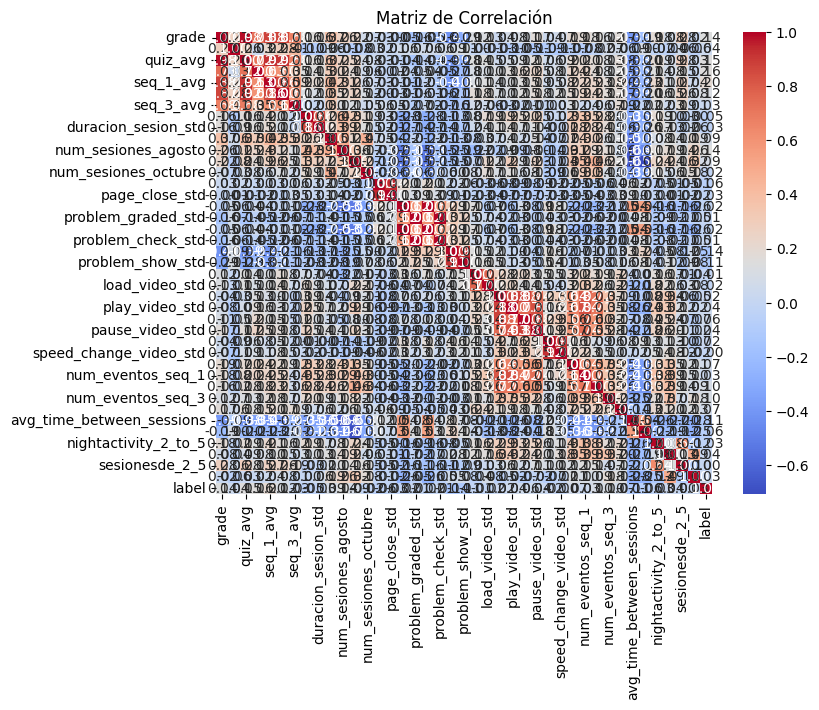

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la matriz de correlación
correlation_matrix = df_entrenamiento.corr()

# Visualizar la matriz de correlación utilizando seaborn y matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

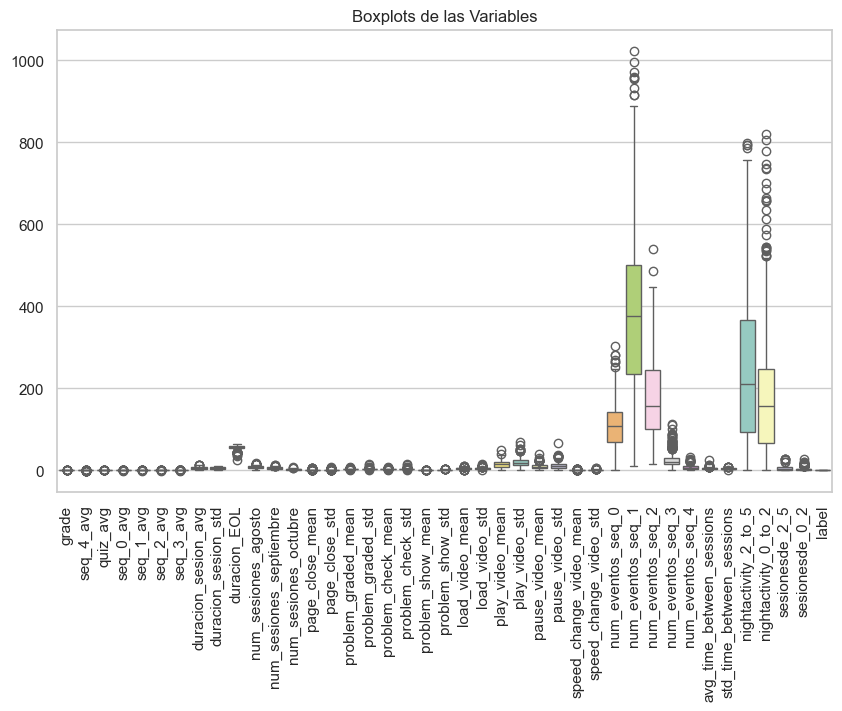

In [10]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear boxplots para cada variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_entrenamiento, palette="Set3")
plt.xticks(rotation=90)  
plt.title('Boxplots de las Variables')
plt.show()

['duracion_sesion_avg', 'seq_1_avg', 'speed_change_video_mean', 'speed_change_video_std', 'seq_0_avg', 'num_eventos_seq_3', 'num_eventos_seq_4', 'problem_show_mean', 'problem_check_mean', 'problem_check_std', 'num_sesiones_noviembre', 'num_eventos_seq_2', 'nightactivity_2_to_5', 'num_sesiones_septiembre', 'problem_show_std', 'avg_day_diff', 'duracion_sesion_std', 'nightactivity_0_to_2', 'pause_video_std', 'play_video_mean', 'std_dev_day_diff', 'pause_video_mean', 'problem_graded_mean', 'load_video_std', 'problem_graded_std', 'num_eventos_seq_0', 'load_video_mean', 'num_sesiones_agosto', 'duracion_EOL', 'play_video_std', 'num_eventos_seq_1', 'grade', 'quiz_avg', 'sesionesde_2_5', 'sesionesde_0_2', 'seq_3_avg', 'seq_2_avg', 'page_close_std', 'page_close_mean', 'seq_4_avg']

In [11]:
# Calcular la correlación entre todas las características y la etiqueta
correlation_matrix = df_entrenamiento.corr()
correlation_with_label = correlation_matrix['label'].abs()

# Seleccionar las características con mayor correlación
selected_features = correlation_with_label[correlation_with_label > 0.05].index.tolist()

# Crear un nuevo DataFrame con solo las características seleccionadas y la etiqueta
selected_data = df_entrenamiento[selected_features]

In [12]:
selected_data

,grade,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,duracion_sesion_avg,duracion_EOL,num_sesiones_agosto,num_sesiones_septiembre,page_close_mean,problem_show_mean,problem_show_std,pause_video_mean,num_eventos_seq_0,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,avg_time_between_sessions,std_time_between_sessions,label
0,1.000000,0.965517,1.000000,1.000000,1.000000,4.944454,64.000000,5.000000,3.000000,0.0,0.000000,0.000000,8.700000,76.000000,128.000000,16.000000,20.000000,7.111111,3.370625,1
1,0.990000,0.956897,1.000000,0.977273,1.000000,2.410485,60.000000,7.000000,5.000000,0.0,0.142857,0.534522,4.428571,70.000000,90.000000,16.000000,6.000000,4.615385,2.844247,1
2,1.000000,0.965517,1.000000,1.000000,1.000000,3.794893,59.000000,13.000000,7.000000,0.0,0.000000,0.000000,7.571429,197.000000,151.000000,47.000000,8.000000,2.950000,2.350252,1
3,0.880000,0.850690,0.625000,0.909091,0.907778,4.008391,58.000000,9.000000,5.000000,0.0,0.400000,0.632456,13.600000,177.000000,201.000000,33.000000,9.000000,4.142857,3.084880,1
4,1.000000,0.965517,1.000000,1.000000,1.000000,9.352263,58.000000,11.000000,6.000000,0.0,0.000000,0.000000,15.333333,264.000000,80.000000,19.000000,11.000000,3.411765,3.298841,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.926868,0.856774,1.000000,0.742882,0.779122,4.146378,53.686827,6.674731,4.662635,0.0,0.276098,0.525444,6.231431,57.818561,158.818561,10.397845,1.325269,4.506014,3.697871,0
604,0.926484,0.897527,0.866209,0.942383,0.910806,5.895934,56.859341,7.140659,4.605494,0.0,0.322184,0.668790,8.403503,113.476921,155.428576,17.183517,4.789011,4.455478,4.099863,0
605,0.957893,0.927401,0.947313,0.846920,1.000000,4.180800,53.842985,5.789254,6.157015,0.0,0.558957,1.552358,6.939955,111.950448,193.937910,16.789254,12.107463,3.661868,3.333684,0
606,0.869460,0.836817,0.717063,0.831517,0.833140,6.648346,54.640749,9.113751,8.113751,0.0,0.108045,0.316410,12.410940,187.305256,265.604752,30.586753,8.491001,3.184089,2.587531,0


In [13]:
X = selected_data.drop(columns=['label'])  # Características


y = selected_data['label']  # Etiquetas



In [14]:
#X_new = X_new.drop(columns=['duracion_EOL', 'play_video_std', 'num_eventos_seq_1', 'grade', 'quiz_avg', 'sesionesde_2_5', 
#                                   'sesionesde_0_2', 'seq_3_avg', 'seq_2_avg', 'page_close_std', 'page_close_mean', 'seq_4_avg'])

In [15]:
'''
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Supongamos que 'df' es tu DataFrame original con las características numéricas que deseas clusterizar
# Selecciona solo las columnas numéricas
numeric_columns = X.select_dtypes(include=['float64', 'int64'])

# Escala las características para asegurar que todas estén en la misma escala
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Determina el número óptimo de clústeres utilizando, por ejemplo, el método del codo
# Aquí uso el algoritmo KMeans como ejemplo
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Grafica el método del codo para ayudar a determinar el número óptimo de clústeres
import matplotlib.pyplot as plt
plt.plot(range(1, 100), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS (Suma de Cuadrados Intra-Cluster)')
plt.show()
'''


"\nimport pandas as pd\nfrom sklearn.cluster import KMeans\nfrom sklearn.preprocessing import StandardScaler, MinMaxScaler\n\n# Supongamos que 'df' es tu DataFrame original con las características numéricas que deseas clusterizar\n# Selecciona solo las columnas numéricas\nnumeric_columns = X.select_dtypes(include=['float64', 'int64'])\n\n# Escala las características para asegurar que todas estén en la misma escala\nscaler = MinMaxScaler()\nscaled_data = scaler.fit_transform(numeric_columns)\n\n# Determina el número óptimo de clústeres utilizando, por ejemplo, el método del codo\n# Aquí uso el algoritmo KMeans como ejemplo\nwcss = []\nfor i in range(1, 100):\n    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)\n    kmeans.fit(scaled_data)\n    wcss.append(kmeans.inertia_)\n\n# Grafica el método del codo para ayudar a determinar el número óptimo de clústeres\nimport matplotlib.pyplot as plt\nplt.plot(range(1, 100), wcss)\nplt.title('Método del Cod

In [16]:
'''
# Basándote en el gráfico del método del codo, elige el número óptimo de clústeres
optimal_clusters = 20  # ¡Ajusta esto según tu análisis del gráfico!

# Realiza la clusterización con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
X['cluster_label'] = kmeans.fit_predict(scaled_data)

# Ahora, 'cluster_label' contiene las etiquetas de clúster para cada fila en tu DataFrame
X
'''

"\n# Basándote en el gráfico del método del codo, elige el número óptimo de clústeres\noptimal_clusters = 20  # ¡Ajusta esto según tu análisis del gráfico!\n\n# Realiza la clusterización con el número óptimo de clústeres\nkmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)\nX['cluster_label'] = kmeans.fit_predict(scaled_data)\n\n# Ahora, 'cluster_label' contiene las etiquetas de clúster para cada fila en tu DataFrame\nX\n"

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314159, stratify=y)


In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Selecciona las columnas que deben ser escaladas
cols_to_scale = X_train.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Ajusta el scaler con los datos de entrenamiento solo para aquellas columnas que no están en el rango [0, 1]
scaler = MinMaxScaler()
for col in cols_to_scale:
    if X_train[col].min() < 0 or X_train[col].max() > 1:
        X_train[col] = scaler.fit_transform(X_train[[col]])
        # Transforma también los datos de prueba usando el mismo scaler
        X_test[col] = scaler.transform(X_test[[col]])
        X_new[col] = scaler.transform(X_new[[col]])



In [20]:
import optuna
import tensorflow as tf
from tensorflow import keras

def objective(trial):
    # Definir espacio de búsqueda de hiperparámetros
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2)
    num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 8)
    num_hidden_units = trial.suggest_int("num_hidden_units", 16, 512)
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
    optimizer = trial.suggest_categorical("optimizer", ["adam", "sgd", "rmsprop"])
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid", "elu"])
    batch_size = trial.suggest_categorical("batch_size", [608//16, 608//32, 608//64])
    
    # Construir el modelo de red neuronal con los hiperparámetros
    model = keras.Sequential()
    for _ in range(num_hidden_layers):
        model.add(keras.layers.Dense(num_hidden_units, activation=activation))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(dropout_rate))
        
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    # Compilar y entrenar el modelo
    if optimizer == "adam":
        optimizer_obj = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "sgd":
        optimizer_obj = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "rmsprop":
        optimizer_obj = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizador no soportado")

    model.compile(optimizer=optimizer_obj,
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    
    early_stopping = keras.callbacks.EarlyStopping(
        patience=20,
        min_delta=0.001,
        restore_best_weights=True,
    )
    
    model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Evaluar el modelo
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    # Calcular el puntaje F1
    f1 = f1_score(y_test, y_pred)

    
    # Almacenar los pesos del modelo como un atributo del ensayo de Optuna
    trial.set_user_attr("model_weights", model.get_weights())
    
    # Guardar el modelo en los atributos de usuario del mejor intento
    trial.set_user_attr('model', model)

    return f1

# Crear un estudio Optuna

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000)

# Obtener el mejor conjunto de hiperparámetros
best_params = study.best_params
print("Mejor conjunto de hiperparámetros:", best_params)

# Después de la optimización, antes de guardar el objeto Study
best_model = study.best_trial.user_attrs.get('model')


[I 2023-12-03 10:17:44,663] A new study created in memory with name: no-name-ae2cab59-0681-4705-9ede-5ac176ca3405


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:17:57,586] Trial 0 finished with value: 0.5057471264367817 and parameters: {'learning_rate': 0.0010383946625902587, 'num_hidden_layers': 3, 'num_hidden_units': 110, 'dropout_rate': 0.21632087472663142, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 38}. Best is trial 0 with value: 0.5057471264367817.


4/4 [==============================] - 0s 8ms/step


KeyboardInterrupt: 

In [ ]:
best_model = study.best_trial.user_attrs.get('model')


In [ ]:
from sklearn.metrics import classification_report
# Hacer predicciones con el mejor modelo en el conjunto de prueba
y_pred = (best_model.predict(X_test) > 0.5).astype(int)

# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", report)

4/4 [==============================] - 0s 6ms/step
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93        61
           1       0.93      0.92      0.92        59

    accuracy                           0.93       120
   macro avg       0.93      0.92      0.92       120
weighted avg       0.93      0.93      0.92       120



In [56]:
best_model.save("mejor_modelo.h5")


c:\Users\tomas\anaconda3\envs\Lab_6\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
from tensorflow.keras.models import load_model

# Cargar el modelo desde el archivo
loaded_model = load_model("mejor_modelo.h5", compile=False)


ModuleNotFoundError: No module named 'tensorflow.keras'

In [59]:
from sklearn.metrics import classification_report
# Hacer predicciones con el mejor modelo en el conjunto de prueba
y_pred = (loaded_model.predict(X_test) > 0.5).astype(int)

# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", report)

NameError: name 'loaded_model' is not defined

In [23]:
# Excluir la columna 'label' de selected_features si está presente
selected_features = [feature for feature in selected_features if feature != 'label']

# Filtrar el conjunto de datos con las características seleccionadas
X_new = X_new[selected_features]


In [24]:
X_new

,grade,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,duracion_sesion_avg,duracion_EOL,num_sesiones_agosto,num_sesiones_septiembre,page_close_mean,problem_show_mean,problem_show_std,pause_video_mean,num_eventos_seq_0,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,avg_time_between_sessions,std_time_between_sessions
0,0.94,0.905172,1.000000,0.980487,0.951093,0.285342,1.033899,0.460509,0.750000,0.000000,0.061224,0.098593,0.072022,0.181507,0.140108,0.187500,0.000000,0.113003,0.218534
1,0.79,0.758621,0.582588,0.687788,0.608748,0.712902,0.898302,0.258200,0.166667,0.000000,0.058442,0.098829,0.112818,0.147260,0.080473,0.008929,0.000000,0.370649,0.660515
2,0.85,0.818966,1.000000,0.824381,0.804374,0.501004,0.830504,0.460509,0.250000,0.000000,0.000000,0.000000,0.177285,0.243151,0.090092,0.196429,0.090909,0.229483,0.362409
3,0.80,0.773103,1.000000,0.824381,0.576469,0.409770,0.762706,0.460509,0.416667,0.000000,0.160714,0.253895,0.089681,0.294521,0.147802,0.133929,0.121212,0.162724,0.188366
4,0.95,0.913793,1.000000,0.804868,1.000000,0.306047,0.932202,0.393072,0.333333,0.000000,0.281250,0.396394,0.232687,0.280822,0.099710,0.178571,0.121212,0.192858,0.360120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.78,0.750000,0.582588,0.590222,0.706561,0.270298,0.288117,0.055890,0.166667,1.010204,0.642857,0.627646,0.409972,0.215753,0.088168,0.366071,0.242424,0.467078,0.601827
139,0.95,0.913793,1.000000,0.843894,0.951093,0.335622,0.423713,0.123327,0.333333,0.000000,0.183673,0.350409,2.700831,0.667808,1.717539,0.446429,0.272727,0.146034,0.244144
140,0.74,0.710000,0.582588,0.590222,0.593098,0.173901,0.423713,0.123327,0.500000,0.000000,0.642857,0.554045,0.349030,0.633562,0.653735,0.473214,0.060606,0.122689,0.225302
141,0.59,0.568966,0.165175,0.375576,0.266402,0.456174,0.355915,0.258200,0.166667,0.000000,0.000000,0.000000,0.278519,0.222603,0.172811,0.089286,0.000000,0.226006,0.753108


In [25]:
# Realizar predicciones con el modelo cargado
y_pred = (best_model.predict(X_new) > 0.5).astype(int)

# Agregar las predicciones como una nueva columna al conjunto de datos original
resultados = pd.DataFrame({'username': df_val['username'], 'Prediccion': y_pred.flatten()})

# Guardar los resultados en un archivo CSV
resultados.to_csv('resultados_predichos1.csv', index=False)

5/5 [==============================] - 0s 5ms/step
